# Juego de Trivia con NLP  
## Metodología KDD y Análisis Exploratorio de Datos (EDA)

Este proyecto aplica la metodología KDD y el análisis exploratorio de datos (EDA)
a un dataset de preguntas de trivia de opción múltiple, utilizando técnicas básicas
de Procesamiento de Lenguaje Natural (NLP) en Google Colab.


In [9]:
import pandas as pd

# Cargar el dataset
df = pd.read_excel("categorias.xlsx")

# Mostrar las primeras filas
df.head()


,PREGUNTA,R1 (CORRECTA),R2 (INCORRECTO),R3 (INCORRECTA),R4 (INCORRECTA)
0,¿Quién es el protagonista de “Piratas del Cari...,Jack Sparrow,Will Turner,Barbossa,Davy Jones
1,¿Qué personaje vive en una piña bajo el mar?,Bob Esponja,Patricio,Calamardo,Arenita
2,¿Qué saga incluye varitas mágicas?,Harry Potter,Star Wars,Narnia,Divergente
3,¿Quién canta “Shape of You”?,Ed Sheeran,Shawn Mendes,Justin Bieber,The Weeknd
4,¿Qué superhéroe es de Marvel?,Iron Man,Batman,Flash,Superman


## 1. Selección de Datos (KDD)

El dataset utilizado fue creado manualmente y contiene preguntas de trivia
de opción múltiple. Cada pregunta cuenta con cuatro opciones de respuesta,
de las cuales solo una es correcta.


In [10]:
# Información general del dataset
df.info()
# Ver si hay datos nulos
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   PREGUNTA         200 non-null    object
 1   R1 (CORRECTA)    200 non-null    object
 2   R2 (INCORRECTO)  200 non-null    object
 3   R3 (INCORRECTA)  200 non-null    object
 4   R4 (INCORRECTA)  200 non-null    object
dtypes: object(5)
memory usage: 7.9+ KB


,0
PREGUNTA,0
R1 (CORRECTA),0
R2 (INCORRECTO),0
R3 (INCORRECTA),0
R4 (INCORRECTA),0


In [11]:
# Longitud de cada pregunta
df['longitud_pregunta'] = df['PREGUNTA'].apply(lambda x: len(x.split()))

df['longitud_pregunta'].describe()


,longitud_pregunta
count,200.000000
mean,6.870000
std,2.412926
min,3.000000
25%,5.000000
50%,7.000000
75%,8.000000
max,16.000000


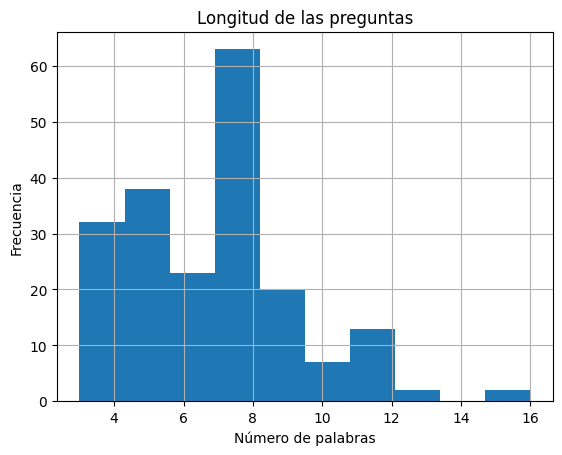

In [12]:
import matplotlib.pyplot as plt

df['longitud_pregunta'].hist()
plt.title("Longitud de las preguntas")
plt.xlabel("Número de palabras")
plt.ylabel("Frecuencia")
plt.show()


## 2. Análisis Exploratorio de Datos (EDA)

El análisis exploratorio muestra que las preguntas tienen una longitud moderada,
lo cual es adecuado para un juego de trivia. El dataset es consistente y no
presenta valores nulos, lo que permite aplicar técnicas de NLP.


In [13]:
import nltk
import re
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'[^a-záéíóúñ\s]', '', texto)
    palabras = texto.split()
    palabras = [p for p in palabras if p not in stop_words]
    return " ".join(palabras)

df['pregunta_limpia'] = df['PREGUNTA'].apply(limpiar_texto)

df[['PREGUNTA', 'pregunta_limpia']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,PREGUNTA,pregunta_limpia
0,¿Quién es el protagonista de “Piratas del Cari...,quién protagonista piratas caribe
1,¿Qué personaje vive en una piña bajo el mar?,personaje vive piña bajo mar
2,¿Qué saga incluye varitas mágicas?,saga incluye varitas mágicas
3,¿Quién canta “Shape of You”?,quién canta shape of you
4,¿Qué superhéroe es de Marvel?,superhéroe marvel


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['pregunta_limpia'])

X.shape


(200, 466)

In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df['grupo'] = kmeans.fit_predict(X)

df[['PREGUNTA', 'grupo']].head()


,PREGUNTA,grupo
0,¿Quién es el protagonista de “Piratas del Cari...,2
1,¿Qué personaje vive en una piña bajo el mar?,0
2,¿Qué saga incluye varitas mágicas?,0
3,¿Quién canta “Shape of You”?,2
4,¿Qué superhéroe es de Marvel?,0


## Conclusiones

Se aplicó correctamente la metodología KDD al dataset de trivia, incluyendo
selección de datos, EDA, preprocesamiento, transformación y minería de datos.
El uso de NLP permite organizar y analizar las preguntas, facilitando la
implementación de un juego de trivia inteligente.


## Relación con el Juego de Trivia

El dataset analizado corresponde a un juego de trivia de opción múltiple.
La aplicación de la metodología KDD permitió analizar, limpiar y transformar
las preguntas mediante técnicas de NLP. Este análisis facilita la selección
dinámica de preguntas, la organización del contenido y futuras mejoras del
juego, como la clasificación automática de preguntas o la detección de
preguntas similares.
